In [1]:
import numpy as np
import pandas as pd
import math
from numpy.linalg import inv
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from tabulate import tabulate

In [2]:
def rka(model, s0, dt):
    
    '''Runge-Kutta de 4ª Ordem que apenas realiza um passo da iteração'''
    s = np.zeros(len(s0))
    
    k1 = dt * model(s0)
    k2 = dt * model(s0 + k1/2)
    k3 = dt * model(s0 + k2/2)
    k4 = dt * model(s0 + k3)
           
    ds = (k1 + 2*k2 + 2*k3 +k4)/6
    
    #s[:,i+1] = s[:,i] + ds
    #s.append(s[:,i] + ds)
    #s.np.append(s[:,i] + ds, axis = 0)
    s = s0 + ds
    return s

In [3]:
def lr_model(s, k1 = 10, k2= 28, k3 = 8.0/3.0):
    
    """
    Modelo de Lorenz com Linearização 
    Declara as equações do Sistema de Lorenz
    Retorna um vetor com a derivada primeira de cada variável em relação ao tempo 
    Linearização feita a partir do JACOBIANO da função
    """
    
    #o tamanho do array de s representa o quantas variáveis estão na EDO
    x = s[0]
    y = s[1]
    z = s[2]
    
    #as variáveis do modelo linearizado (Perturbação):
    
    xp1= s[3]
    xp2= s[4]
    xp3= s[5]
    
    yp1= s[6]
    yp2= s[7]
    yp3= s[8]
    
    zp1= s[9]
    zp2= s[10]
    zp3= s[11]
    
    #constantes de referência do sistema
    #k1 = 10  - sigma 
    #k2 = 28 - rô
    #k3 = 8.0/3.0 - beta 
       
    ### Utilizar vetores para ficar apenas três expressões
    #Equações diferenciais do sistema
    dxdt = k1*(y - x)
    dydt = x*(k2-z)-y
    dzdt = x*y-k3*z
    
    #Equações Linearizadas
    dxp1= k1 * (yp1 - xp1)
    dxp2= k1 * (yp2 - xp2)
    dxp3= k1 * (yp3 - xp3)
    
    dyp1= (k2 - z)*xp1 - yp1 - x*zp1 
    dyp2= (k2 - z)*xp2 - yp2 - x*zp2 
    dyp3= (k2 - z)*xp3 - yp3 - x*zp3 
    
    dzp1= xp1*y + x*yp1 - k3*zp1
    dzp2= xp2*y + x*yp2 - k3*zp2
    dzp3= xp3*y + x*yp3 - k3*zp3

    #Queremos que retorne como um array para poder fazer as operações
    
    return np.array([dxdt,dydt,dzdt,
                    dxp1,dxp2,dxp3,
                    dyp1, dyp2,dyp3,
                    dzp1, dzp2, dzp3])

In [4]:
def lr_model_clonado(s, k1 = 10, k2= 28, k3 = 8.0/3.0):
    
    """
    Modelo de Lorenz com Linearização 
    Declara as equações do Sistema de Lorenz
    Retorna um vetor com a derivada primeira de cada variável em relação ao tempo 
    Linearização feita a partir do DINÂMICA CLONADA
    AS equações da parte linearizada são cópias da equação original
    
    """
    #ATENÇÃO: Necessário adequar as condições iniciais para o uso da dinâmica clonada. 
    
    
    #o tamanho do array de s representa o quantas variáveis estão na EDO
    x = s[0]
    y = s[1]
    z = s[2]
    
    #as variáveis do modelo linearizado (Perturbação):
    
    xp1= s[3]
    xp2= s[4]
    xp3= s[5]
    
    yp1= s[6]
    yp2= s[7]
    yp3= s[8]
    
    zp1= s[9]
    zp2= s[10]
    zp3= s[11]
    
    #constantes de referência do sistema
    #k1 = 10  - sigma 
    #k2 = 28 - rô
    #k3 = 8.0/3.0 - beta 
       
    #Equações diferenciais do sistema
    dxdt = k1*(y - x)
    dydt = x*(k2-z)-y
    dzdt = x*y-k3*z
    
    
    ### Utilizar vetores para ficar apenas três expressões
    #Equações Linearizadas
    dxp1= k1 * (yp1 - xp1)
    dxp2= k1 * (yp2 - xp2)
    dxp3= k1 * (yp3 - xp3)
    
    dyp1= (k2 - zp1)*xp1 - yp1 
    dyp2= (k2 - zp2)*xp2 - yp2 
    dyp3= (k2 - zp3)*xp3 - yp3 
    
    dzp1= xp1*yp1 - k3*zp1
    dzp2= xp2*yp2 - k3*zp2
    dzp3= xp3*yp3 - k3*zp3
    
    #Queremos que retorne como um array para poder fazer as operações
    
    return np.array([dxdt,dydt,dzdt,
                    dxp1,dxp2,dxp3,
                    dyp1, dyp2,dyp3,
                    dzp1, dzp2, dzp3])

In [5]:
#Condições Iniciais
def inicializar():
    x = np.zeros(nn)
    cum = np.zeros(n)
    
    #Sistema dinâmico: 
    #Condições Iniciais do Sistema:
    x[0] = 0.0
    x[1] = 1.0
    x[2] = 0.0
    
    
    #verificar se é necessário
    for i in range(n,nn, 1):
        x[i]=0.0
    
    #Extensão do Sistema (perturbação)
    #Na perturbação, teremos um deslocamento em cada eixo (primeiro em x, depois em y, depois em z)
    #Por isso os elementos não nulos serão x[3] = xp1, x[7] = yp2 e x[11] = zp3
    for i in range(0,n,1):
        x[n+(i*n+i)]=1.0
    
    for i in range(0,n,1):
        cum[i]=0.0
    
    ### INSerir para caso seja modelo de dinamica clonada: 
    ## a condição inicial de cada clone será a mesma da inicial do sistema, mais uma perturbação na direção n, em magnetude delta:
    
    # delta = 0.0001
    # ci = x[0:3]
    # delta_clones = delta * Identidade(n) ## cada coluna é a perturbação da condição inicial, para um clone especifico
    # ci_clones =  ci + delta_clones ##Cada coluna é a condição inicial de um clone
    
    #listando, seria: 
    '''

    x[0] = 0.0
    x[1] = 1.0
    x[2] = 0.0
    x[3] = x[0] + delta
    x[4] = x[1]
    x[5] = x[2]
    x[6] = x[0]
    x[7] = x[1] + delta
    x[8] = x[2]
    x[9] = x[0]
    x[10] = x[1]
    x[11] = x[2] + delta
    
    
    '''
    
    
    return x, cum

In [6]:
a = [1,2,3,4,5,6,5]
a[0:3]

[1, 2, 3]

In [7]:
def Lyapunov(x, cum, n, t, t0, dt):
    
    ''' Método Wolf para calculo de Expoentes de Lyapunov. 
    Função realiza uma Normalização dos vetores, pelo metodo GramSchimidt.
    
    Funcionamento: 
    Este código recebe um vetor X, de tamanho nn = Nn*(n+1), composto por:
    
    1 - o Estado do sistema no momento x(T) (de dimensão n) >  
    No caso de Lorenz, será um vetor de 3 dimensões, que representa o estado do sistema fiduciário(ou de referencia) no instante t
    
    Ou seja: x(T)= {x0,x1,x2}
    
    2- Uma base de n vetores delta (Cada um de dimensão n). 
    Em Lorenz, teremos : delta1=  {x3,x4,x5}; delta2={x6,x7,x8} e delta3= {x9,x10,x11}
    
    Ou seja: X = {x(T) delta 1 delta 2 delta3}
    
    O código irá, então, ortogonalizar a base de deltas, formando uma base de vetores v: v1,v2,v3
    O módulo desses vetores sera armazenado em um somatório para que se calculo o exponente de lyapunov em cada uma das dimensões
    
    A base v então é normalizada (módulo =1) numa base u: u1, u2, u3 que será utilizada nas novas iterações ]
    (ver explicação sobre resultado do código)
    

    Parâmetros: 
    
    x: O parâmetro x é um estado do sistema, ou seja, terá dimensão nn 
    nn: (dimensão que considera o sistema e sua parte linearizada)
    nn= n*(n+1)
    
    cum: É uma variável auxiliar que armazena o somatório do módulo dos vetore. 
    Este somatório, quando divido pelo total de tempo percorrido (t+ dt - t0). 
    cum é um vetor de n elementos. Cada um desses elementos armazena o somatório de cada um dos autovetores do sistema. 
    Com isso, ao final pode-se calcular todos os n expoentes de Lyapunov. Ou seja, todo o espectro. 
    
    n: Dimensão do Espaço vetorial do sistema Estudado (para o sistema de Lorenz, n=3)
    
    t: Instante temporal referente ao estado x. Ou seja, estamos rodando cada iteração para o estado x(t). É um elemeto do vetor eixot
    
    t0: Instante Inicial 
    
    dt: delta de tempo percorrido a cada iteração
    
    
    Saída do código: 
    
    x: O código libera um novo vetor estado X, agora composto por: 
    X = {x(T) u1 u2 u3} , onde u1,u2,u3 são a base ortonormalizada de delta1,delta2,delta3
    
    cum: variável que armazena o somatório dos módulos dos vetores v, agora com o módulo da útlima iteração incluído
    lb: Os n expoentes de Lyapunov (considera todas as iterações até a corrente, e não apenas a corrente iteração) 
    
    '''
    
    ### Define info variáveis:  
    znorm = np.zeros(n)
    lb = np.zeros(n)
    
    m = n-1
    znorm[0]=0.0
    #<=m é a mesma coisa que range até n
    
    #normalizando o primeiro vetor
    for j in range (0,n):
        
        znorm[0] = znorm[0] + (x[n+(j*m+j)])**2 #permite percorrer o x de 3 em 3 (primeiro a primeira linearização, com x3, x6 e x9; depois em x4, x7 e x10, e aí em diante)
        
    znorm[0] = znorm[0] ** (1/2)
    
    for j in range(0,n):
        x[n+(m*j+j)] = x[n+(m*j+j)]/znorm[0]
    
    
    ##### Gerar novo conjunto de vetores ortonormais: 
    for j in range(1,n):
        #gsc = np.zeros(j-1)
        gsc = np.zeros(j)
        
        #Gerar j-1 (ou n-2) coeficientes GSR   
        for k in range(0,j):
            gsc[k] = 0.0
            
            for l in range(0,n):
                gsc[k] = gsc[k] + x[n+(m*l+(j+l))]*x[n+(m*l +(k+l))]
                
    
        #Construir um novo vetor:
        for k in range(0,n):
            
            for l in range(0,j):
                x[n+(m*k+(j+k))] = x[n+(m*k+(j+k))] - gsc[l]*x[n+(m*k+(l+k))]
                
        #Calculando a norma do vetor: 
        znorm[j] = 0.0
        
        for k in range(0,n):
            znorm[j] = znorm[j] + x[n+(m*k+(j+k))] ** 2 
        
        znorm[j] = znorm[j] ** (1/2)
        
        #Normaliza o novo vetor: 
        for k in range(0,n):
            x[n+(m*k+(j+k))] =  x[n+(m*k+(j+k))]/znorm[j]
    
    ###ATENÇÃO: COLOCAR A MULTIPLICAÇÃO POR UM FATOR DE DINÂMICA CLONADA. A SAÍDA DOS DOIS METODOS NÃO É A MESMA
    
    ## A saída do método Wolf atribui, ao vetor x de perturbação, o autovetor normalizado u. 
    # Ou seja, ao final de cada iteração, teremos que a perturbação inicial (cuja primeira era, simplesmente, a matriz diagonal)
    # se tornará a base de autovetores ortonormalizada. 
    # Traduzindo: a hiperesfera de perturbação, que no inicio é definida na base canonica, passa a ser definida na base 
    # dos autovetores ortonormalizados para as próximas iteraçõe. 
    
    #COntudo, o método da dinamica clonada funciona diferente. Nele, não estamos estudando a perturbação, a tangente do sistema. 
    # Estamos analisando, de fato, uma cópia do sistema. Ou seja, x[11] do Wolf é uma perturbaão (xp3, que é essencialmente diferente de x3), enquanto que, 
    # na dinamica clonada, x[11] é o x3 daquele clone: x[11] = xreferencia + xp3.
    #
    #Essa é a primeira diferença, ligaada ao que essencialmente se analisa em cada modelo. 
    
    # 
    ###ERRADO:
    #Outra mudança, um pouco mais sutil, é que, no wolf, corrigimos as perturbações para a base ortonormal e voltamos a simular
    # Na dinamica clonada, corrigimos o resultado na direção da diferença do clone frente à referencia: x0c1 = x(T) - xc1(T)
    # Seria o equivalente ao Z do método Wolf nas anotações do caderno.  
    # Nesse caso, a correção só coincide com a direção do autovetor normalizado no primeiro caso estudado 
    # (primeiro vetor que entra na normalização GS e não muda de direção)
    #
    #
    #
    
    
    #Armazena o módulo dos vetores, para permitir calcular o somatório e, consequentemente, o Expoente:
    for k in range(0,n):
        
        #Para método Wolf:
        cum[k] = cum[k] + np.log(znorm[k])/np.log(2.0)
        lb[k] = cum[k]/(t + dt - t0)
        
        #Para método de Dinamica clonada: 
        #cum[k] = cum[k] + np.log(znorm[k]/delta)/np.log(2.0)
        
        
        #print(znorm[k])
    return x, cum, lb



In [8]:
## Informações do sistema

choice = input("Qual método deseja utilizar?\n (1) Wolf \n (2) Dinâmica Clonada\n")
while str(choice) != "1" and str(choice) != "2":
    print("Selecione 1 ou 2")
    choice = input("Qual método deseja utilizar?\n (1) Wolf \n (2) Dinâmica Clonada\n")

str_rho = input("Qual o rô deseja utilizar?")
rho = float(str_rho)
while rho< 0.0 and type(rho) != "float":
    print("Selecione 1 ou 2")
    str_rho = input("Qual o rô deseja utilizar?")
    rho = float(str_rho)

n = 3 # Graus de Liberdade do Sistema Não Linearizado
nn = n*(n+1) # Total de equações com a parte linearizada. 

t0 = 0.0
tmax = 1500.0
dt = 0.01

#tmax = 10000.0
#dt = 0.5

eixot = np.arange(t0, tmax, dt)
nt = eixot.size

#inicializar()
x, cum = inicializar()
#for t in range (t0, tmax, dt):
sol = np.zeros((nn,nt))

ly_exp = np.zeros((n,nt))
i = 0 
for t in eixot:    
    
    #declarando o modelo
    
    if choice == "1": 
        f = lambda s: lr_model(s, k2 = rho)
        txt = "Wolf"
        
    else: 
        f = lambda s: lr_model_clonado(s, k2 = rho)
        txt = "Din Clonada"
    #Aplicaremos o modelo as condições iniciais: f(x) e utilizaremos 
    #o vetor obtido para iniciar a iteração no Runge Kutta
    a = rka(model = f, s0 = x , dt = dt)
    #print((a))
    #Lyapunov(x = a[len(a)],n = 3, t = t , t0 = t0, dt = dt)
    x, cum, lb = Lyapunov(x = a, cum = cum, n = 3, t = t , t0 = t0, dt = dt)
    #print (x)
    
    #Variavel que armazena as soluções
    sol[:,i] = x 
    #Variável que armazena os expoentes
    ly_exp[:, i] = lb
    i=i+1

Qual método deseja utilizar?
 (1) Wolf 
 (2) Dinâmica Clonada
28
Selecione 1 ou 2
Qual método deseja utilizar?
 (1) Wolf 
 (2) Dinâmica Clonada
1
Qual o rô deseja utilizar?28


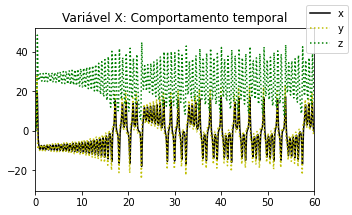

In [9]:
#####plotar resultados
fig = plt.figure(figsize=(5, 3))
plt.title('Variável X: Comportamento temporal')
plt.plot(eixot,sol[0],label = 'x', c='k',)
plt.plot(eixot,sol[1],label = 'y', c='y', ls = ":")
plt.plot(eixot,sol[2],label = 'z', c='g', ls = ":")
plt.xlim(0, 60)
fig.legend()
plt.show()

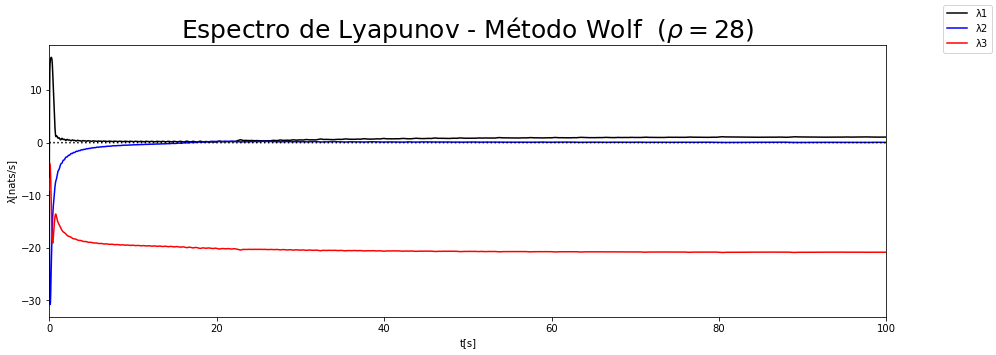

 Os Expoente de Lyapunov, pelo método  Wolf  são: [ 1.28698769e+00  4.71771059e-03 -2.10083910e+01]


In [10]:
#####plotar resultados

fig = plt.figure(figsize=(15, 5))

SMALL_SIZE = 25
MEDIUM_SIZE = 25
BIGGER_SIZE = 25

plt.title('Espectro de Lyapunov - Método Wolf  ('r'$\rho= %.0f)$' %rho, fontsize = BIGGER_SIZE)
plt.plot(eixot,ly_exp[0],label = 'λ1', c = 'k')
plt.plot(eixot,ly_exp[1],label = 'λ2', c='b')
plt.plot(eixot,ly_exp[2],label = 'λ3', c='r')
plt.plot(eixot,np.zeros(len(ly_exp[1])), c='k', ls = ':', lw = 1.5)
plt.xlim(0, 100)
plt.xlabel("t[s]")
plt.ylabel("λ[nats/s]")
#plt.ylim(-25, 1.5)
fig.legend()


plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.show()

print(" Os Expoente de Lyapunov, pelo método ", txt," são:", lb)

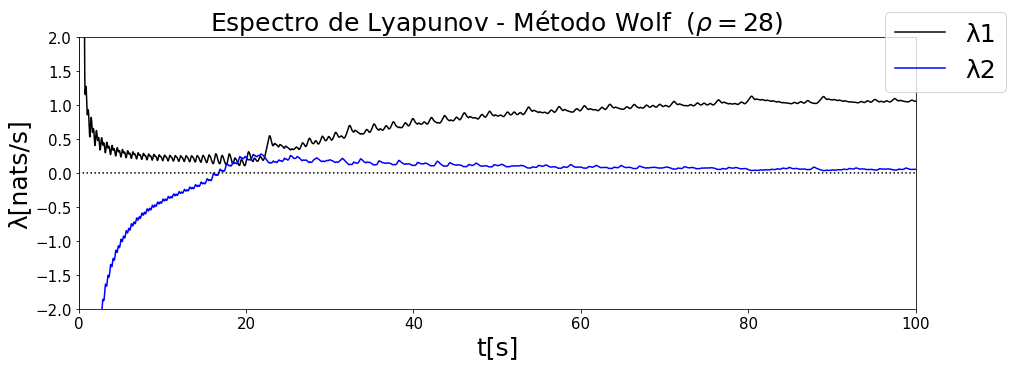

 Os Expoente de Lyapunov, pelo método  Wolf  são: [ 1.28698769e+00  4.71771059e-03 -2.10083910e+01]


In [11]:
#####plotar resultados



fig = plt.figure(figsize=(15, 5))

SMALL_SIZE = 25
MEDIUM_SIZE = 25
BIGGER_SIZE = 25

plt.title('Espectro de Lyapunov - Método Wolf  ('r'$\rho= %.0f)$' %rho, fontsize = BIGGER_SIZE)
plt.plot(eixot,ly_exp[0],label = 'λ1', c = 'k')
plt.plot(eixot,ly_exp[1],label = 'λ2', c='b')
plt.plot(eixot,np.zeros(len(ly_exp[1])), c='k', ls = ':', lw = 1.5)
#plt.plot(eixot,ly_exp[2],label = 'λ3', c='r')
plt.xlim(0, 100)
plt.xlabel("t[s]")
plt.ylabel("λ[nats/s]")
plt.ylim(-2, 2)
fig.legend()


plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.show()

print(" Os Expoente de Lyapunov, pelo método ", txt," são:", lb)

In [12]:
def calculoLyapWolf (n, t0, tmax,  dt, rho, x, cum):
    
    '''
    Função recebe: 
    n- dimensao do sistema
    t0- instante inicial
    tmax - instante final
    dt - passo de tempo a cada iteração
    x - condições iniciais
    cum -  variavel auxiliar que armazena o somatorio dos expoentes
    rho - o Rho do sistema 
    
    '''
    
    #n = 3 # Graus de Liberdade do Sistema Não Linearizado
    nn = n*(n+1) # Total de equações com a parte linearizada. 

    eixot = np.arange(t0, tmax, dt)
    nt = eixot.size

    #inicializar()
    #x, cum = inicializar()
    #for t in range (t0, tmax, dt):
    
    sol = np.zeros((nn,nt))

    ly_exp = np.zeros((n,nt))
    i = 0 
    for t in eixot:    
    
        #declarando o modelo
        f = lambda s: lr_model(s, k2 = rho)
        
        #if choice == "1": 
         #   f = lambda s: lr_model(s, k2 = rho)
         #   txt = "Wolf"
        
        #else: 
        #    f = lambda s: lr_model_clonado(s, k2 = rho)
        #    txt = "Din Clonada"
        
        #Aplicaremos o modelo as condições iniciais: f(x) e utilizaremos 
        #o vetor obtido para iniciar a iteração no Runge Kutta
        a = rka(model = f, s0 = x , dt = dt)
        #print((a))
        #Lyapunov(x = a[len(a)],n = 3, t = t , t0 = t0, dt = dt)
        x, cum, lb = Lyapunov(x = a, cum = cum, n = 3, t = t , t0 = t0, dt = dt)
        #print (x)
    
        #Variavel que armazena as soluções
        sol[:,i] = x 
        #Variável que armazena os expoentes
        ly_exp[:, i] = lb
        i=i+1
    
    
    return sol, ly_exp, eixot

In [13]:
#inicializar()
n=3
nn = n*(n+1)
x, cum = inicializar()

rho = 28

t0 = 0.0
tmax = 1500.0
dt = 0.01


sol_teste, ly_exp_teste, eixot = calculoLyapWolf (n, t0, tmax,  dt, rho, x, cum) 

In [14]:
#inicializar()
n=3
nn = n*(n+1)

#rho = 28

t0 = 0.0
tmax = 1500.0
dt = 0.01


#Resolvendo para distintos rhos:
lista_ly = []
lista_t = []
l_rho_i = [10,15,20,28]
for rho_i in l_rho_i:
    #condicoes iniciais
    x, cum = inicializar()
    
    print('n = %i, \n t0 = %.1f \n tmax = %.1f \n dt = %.3f \n' %(n,t0,tmax, dt))
    print(x)
    print(cum)
    s_i, ly_i, t_i = calculoLyapWolf(n, t0, tmax,  dt, rho_i, x, cum) 
    lista_ly.append(ly_i)
    lista_t.append(t_i)

n = 3, 
 t0 = 0.0 
 tmax = 1500.0 
 dt = 0.010 

[0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0.]
n = 3, 
 t0 = 0.0 
 tmax = 1500.0 
 dt = 0.010 

[0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0.]
n = 3, 
 t0 = 0.0 
 tmax = 1500.0 
 dt = 0.010 

[0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0.]
n = 3, 
 t0 = 0.0 
 tmax = 1500.0 
 dt = 0.010 

[0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0.]


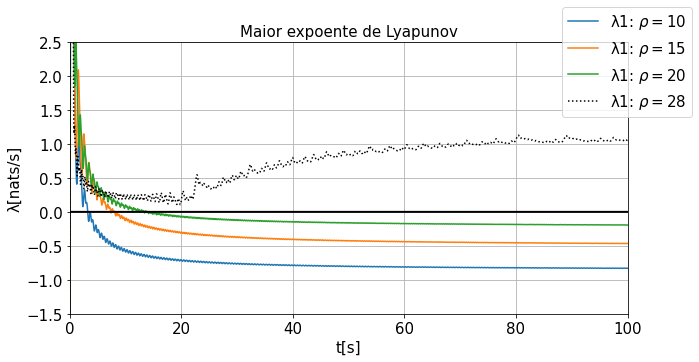

In [15]:
fig_rhos = plt.figure(figsize=(10, 5))

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title

plt.xlim(0,100)
plt.ylim(-1.5,2.5)
a = 5000
for i in range(0,len(lista_ly)):
    
    plt.title('Maior expoente de Lyapunov')
    
    if i == len(lista_ly)-1:
        plt.plot(lista_t[i],lista_ly[i][0],label = 'λ1: 'r'$\rho= %.0f$' %l_rho_i[i], c='k', ls = ":")
    else:    
        plt.plot(lista_t[i],lista_ly[i][0],label = 'λ1: 'r'$\rho= %.0f$' %l_rho_i[i])

        
plt.plot(lista_t[i],np.zeros(len(lista_t[0])),lw = 2, c= 'k')
fig_rhos.legend()

plt.grid()
plt.ylabel('λ[nats/s]')
plt.xlabel('t[s]')
plt.show()

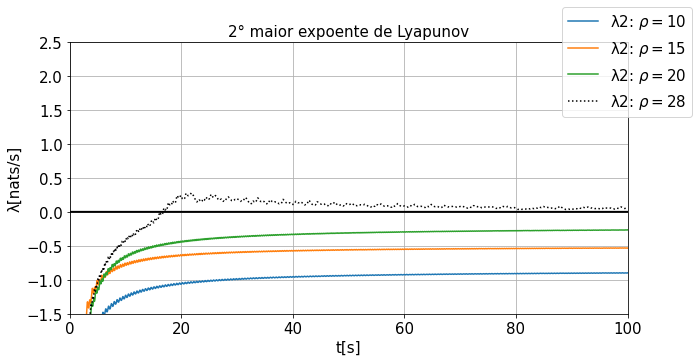

In [23]:
fig_rhos = plt.figure(figsize=(10, 5))

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title


plt.xlim(0,100)
plt.ylim(-1.5,2.5)
a = 5000
for i in range(0,len(lista_ly)):
    
    plt.title('2° maior expoente de Lyapunov')
    
    if i == len(lista_ly)-1:
        plt.plot(lista_t[i],lista_ly[i][1],label = 'λ2: 'r'$\rho= %.0f$' %l_rho_i[i], c='k', ls = ":")
    else:    
        plt.plot(lista_t[i],lista_ly[i][1],label = 'λ2: 'r'$\rho= %.0f$' %l_rho_i[i])

        
plt.plot(lista_t[i],np.zeros(len(lista_t[0])),lw = 2, c= 'k')
fig_rhos.legend()

plt.grid()
plt.ylabel('λ[nats/s]')
plt.xlabel('t[s]')
plt.show()

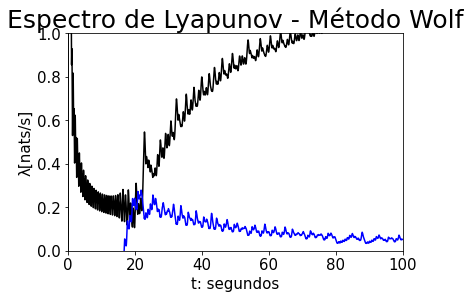

In [17]:
plt.title('Espectro de Lyapunov - Método Wolf', fontsize = BIGGER_SIZE)
plt.plot(eixot,ly_exp_teste[0],label = 'λ1', c = 'k')
plt.plot(eixot,ly_exp_teste[1],label = 'λ2', c='b')
plt.plot(eixot,ly_exp_teste[2],label = 'λ3', c='r')
plt.xlim(0, 100)
plt.ylim(0, 1)
plt.xlabel("t: segundos")
plt.ylabel("λ[nats/s]")
#plt.ylim(-25, 1.5)
fig.legend()

NameError: name 'solucao' is not defined

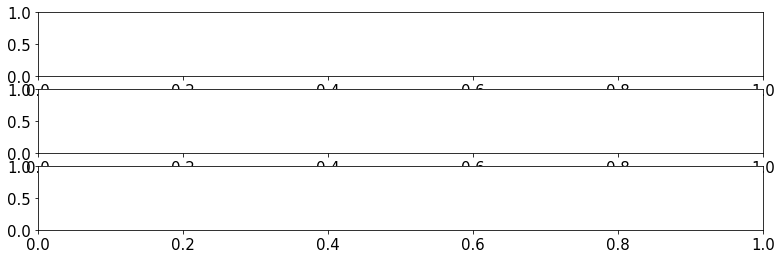

In [18]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(13,4))
ax1, ax2, ax3 = axs

ax1.plot(eixot,solucao[0], c="b", label='x')
ax1.plot(eixot,solucao[1],c="r", label='y');
ax1.plot(eixot,solucao[2], c="y", label='z');

ax2.plot(eixot,ly_exp[0], c="b", label='x');
ax2.plot(eixot,ly_exp[1],c="r", label='y');
ax2.plot(eixot,ly_exp[2], c="y", label='z');

ax3.plot(eixot,ly_exp[0], c="b", label='x');
ax3.plot(eixot,ly_exp[1],c="r", label='y');
ax3.plot(eixot,ly_exp[2], c="y", label='z');

for ax in axs:
    ax.set_xlabel("t")
    ax.grid()
    ax.legend()
    
ax1.set_title("COmportamento do Sistema - Variáveis no Tempo")
ax2.set_title("Expoentes de Lyapunov")
ax3.set_title("Expoentes de Lyapunov - Zoom")

ax1.set_xlim(0,150)
ax3.set_xlim(0,150)
ax3.set_ylim(-2,2)

In [ ]:


s1= pd.Series(np.random.rand(10))
s2= pd.Series(np.random.randn(10))

fig, axes = plt.subplots(nrows=2,ncols=1)

f1= s1.plot(ax=axes[0],label='s1')
l1=axes[0].axhline(0.5,color='black',ls='--')
l1.set_label('l1')

axes[0].legend(loc='best')

f2= s1.plot(ax=axes[1],label='s2')

l2=axes[1].axhline(0.5,color='black',ls='--')

l2.set_label('l2')

axes[1].legend(loc='best')

In [ ]:
n_graf = len(l_rho_i)
n_graf

In [ ]:
n_graf = len(l_rho_i)

fig, axs = plt.subplots(nrows=n_graf, ncols=1, figsize=(15,35))
#ax1, ax2, ax3 = axs


#l_rho_i[i]

#s1= pd.Series(np.random.rand(10))
#s2= pd.Series(np.random.randn(10))

for i in range(n_graf):
    axs[i].plot(lista_t[i],lista_ly[i][0], label = 'λ1', c = 'k')
    axs[i].plot(lista_t[i],lista_ly[i][1], label = 'λ2', c = 'b')
    axs[i].plot(lista_t[i],lista_ly[i][2], label = 'λ3', c = 'r')
    axs[i].plot(lista_t[i],np.zeros(len(lista_t[i])), c='k', ls = ':', lw = 1.5)
    
    axs[i].set_xlabel("t[s]")
    axs[i].set_ylabel("λ[nats/s]")
    axs[i].grid()
    axs[i].legend()
    axs[i].set_title('Espectro de Lyapunov - Método Wolf ('r'$\rho= %.0f)$' %l_rho_i[i])
    axs[i].set_xlim(0,150)
    


#ax1.plot(s1, s2, c="b", label='x')

Text(0.5, 0.98, 'Espectro de Lyapunov\n Método do mapa tangente')

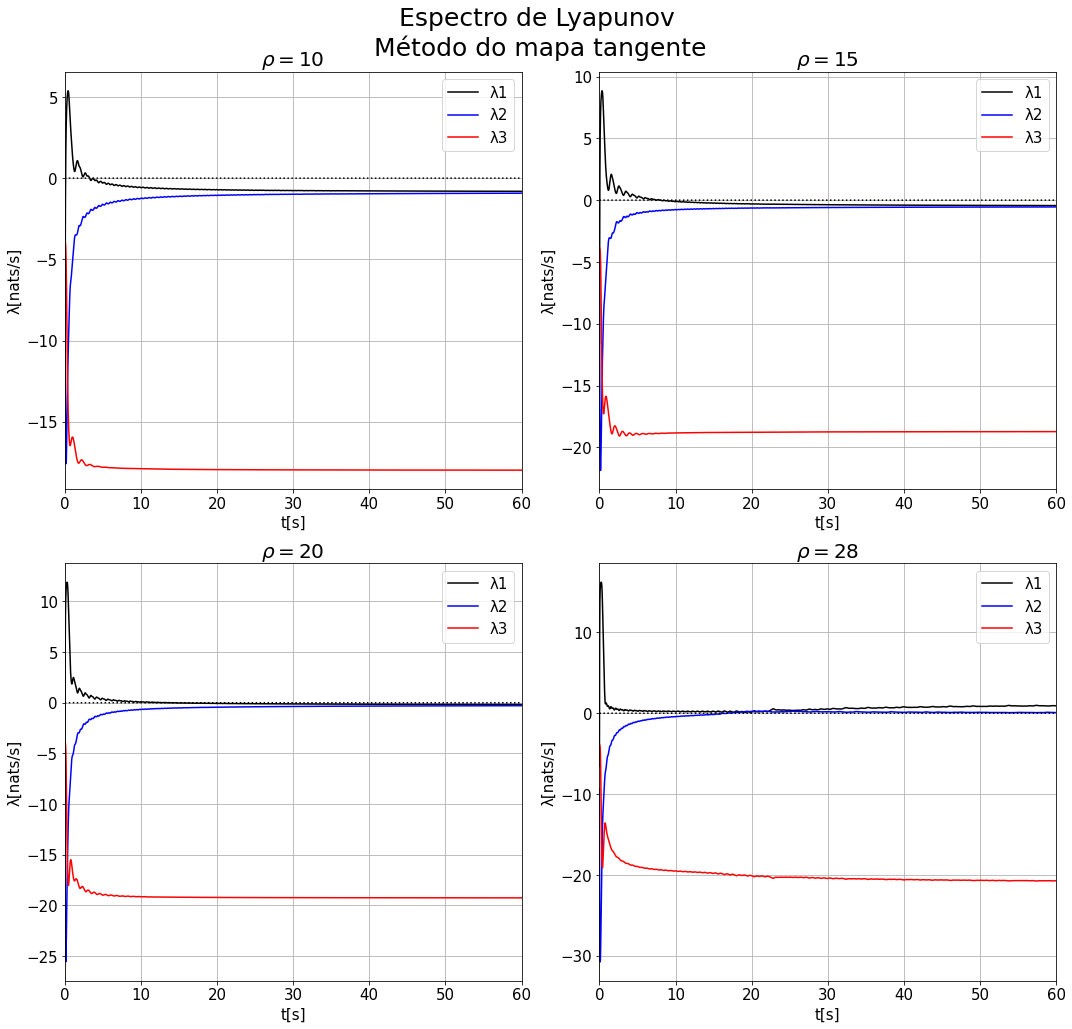

In [21]:
#####Especifico para o Trabalho: 

#n_graf = len(l_rho_i)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title


axs[0,0].plot(lista_t[0],lista_ly[0][0], label = 'λ1', c = 'k')
axs[0,0].plot(lista_t[0],lista_ly[0][1], label = 'λ2', c = 'b')
axs[0,0].plot(lista_t[0],lista_ly[0][2], label = 'λ3', c = 'r')
axs[0,0].plot(lista_t[0],np.zeros(len(lista_t[0])), c='k', ls = ':', lw = 1.5)

axs[0,1].plot(lista_t[1],lista_ly[1][0], label = 'λ1', c = 'k')
axs[0,1].plot(lista_t[1],lista_ly[1][1], label = 'λ2', c = 'b')
axs[0,1].plot(lista_t[1],lista_ly[1][2], label = 'λ3', c = 'r')
axs[0,1].plot(lista_t[1],np.zeros(len(lista_t[1])), c='k', ls = ':', lw = 1.5)

axs[1,0].plot(lista_t[2],lista_ly[2][0], label = 'λ1', c = 'k')
axs[1,0].plot(lista_t[2],lista_ly[2][1], label = 'λ2', c = 'b')
axs[1,0].plot(lista_t[2],lista_ly[2][2], label = 'λ3', c = 'r')
axs[1,0].plot(lista_t[2],np.zeros(len(lista_t[2])), c='k', ls = ':', lw = 1.5)

axs[1,1].plot(lista_t[3],lista_ly[3][0], label = 'λ1', c = 'k')
axs[1,1].plot(lista_t[3],lista_ly[3][1], label = 'λ2', c = 'b')
axs[1,1].plot(lista_t[3],lista_ly[3][2], label = 'λ3', c = 'r')
axs[1,1].plot(lista_t[3],np.zeros(len(lista_t[3])), c='k', ls = ':', lw = 1.5)

i=0
for ax in axs.flatten(): 
    
    ax.set_xlabel
    ax.set_xlabel("t[s]")
    ax.set_ylabel("λ[nats/s]")
    ax.grid()
    ax.legend()
    ax.set_title(''r'$\rho= %.0f$' %l_rho_i[i], size = 20)
    ax.set_xlim(0,60)
    
    i = i+1

#fig.tight_layout(pad=2.0)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


fig.suptitle('Espectro de Lyapunov\n Método do mapa tangente')


Text(0.5, 0.98, 'Espectro de Lyapunov (dois maiores expoentes)\n Método do mapa tangente')

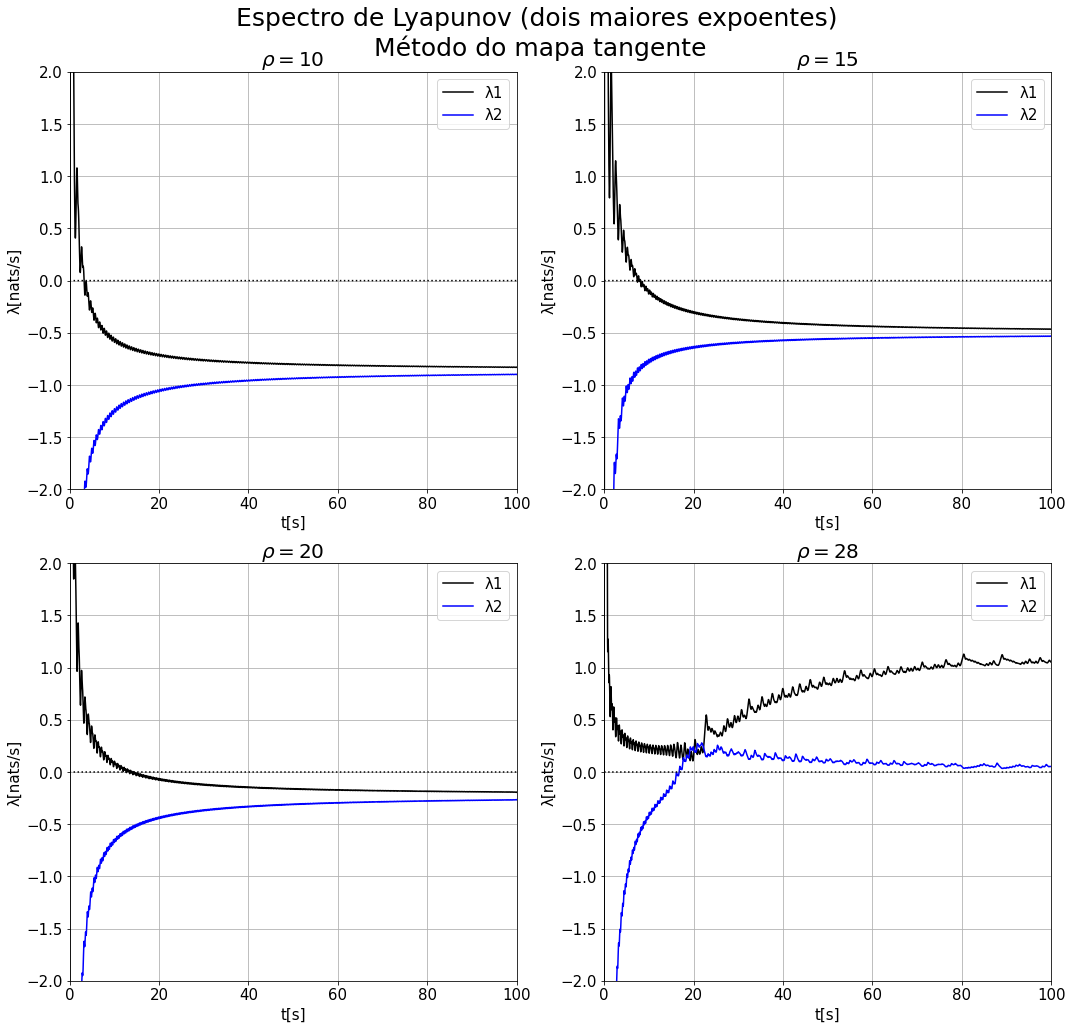

In [22]:
#####Especifico para o Trabalho: 

#n_graf = len(l_rho_i)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title


axs[0,0].plot(lista_t[0],lista_ly[0][0], label = 'λ1', c = 'k')
axs[0,0].plot(lista_t[0],lista_ly[0][1], label = 'λ2', c = 'b')
#axs[0,0].plot(lista_t[0],lista_ly[0][2], label = 'λ3', c = 'r')
axs[0,0].plot(lista_t[0],np.zeros(len(lista_t[0])), c='k', ls = ':', lw = 1.5)

axs[0,1].plot(lista_t[1],lista_ly[1][0], label = 'λ1', c = 'k')
axs[0,1].plot(lista_t[1],lista_ly[1][1], label = 'λ2', c = 'b')
#axs[0,1].plot(lista_t[1],lista_ly[1][2], label = 'λ3', c = 'r')
axs[0,1].plot(lista_t[1],np.zeros(len(lista_t[1])), c='k', ls = ':', lw = 1.5)

axs[1,0].plot(lista_t[2],lista_ly[2][0], label = 'λ1', c = 'k')
axs[1,0].plot(lista_t[2],lista_ly[2][1], label = 'λ2', c = 'b')
#axs[1,0].plot(lista_t[2],lista_ly[2][2], label = 'λ3', c = 'r')
axs[1,0].plot(lista_t[2],np.zeros(len(lista_t[2])), c='k', ls = ':', lw = 1.5)

axs[1,1].plot(lista_t[3],lista_ly[3][0], label = 'λ1', c = 'k')
axs[1,1].plot(lista_t[3],lista_ly[3][1], label = 'λ2', c = 'b')
#axs[1,1].plot(lista_t[3],lista_ly[3][2], label = 'λ3', c = 'r')
axs[1,1].plot(lista_t[3],np.zeros(len(lista_t[3])), c='k', ls = ':', lw = 1.5)

i=0
for ax in axs.flatten(): 
    
    ax.set_xlabel
    ax.set_xlabel("t[s]")
    ax.set_ylabel("λ[nats/s]")
    ax.grid()
    ax.legend()
    ax.set_title(''r'$\rho= %.0f$' %l_rho_i[i], size = 20)
    ax.set_xlim(0,100)
    ax.set_ylim(-2,2)
    
    i = i+1

fig.tight_layout(rect=[0, 0.03, 1, 0.95])


fig.suptitle('Espectro de Lyapunov (dois maiores expoentes)\n Método do mapa tangente')


In [ ]:
n_graf = len(l_rho_i)

fig, axs = plt.subplots(nrows=n_graf, ncols=1, figsize=(15,35))
#ax1, ax2, ax3 = axs


#l_rho_i[i]

#s1= pd.Series(np.random.rand(10))
#s2= pd.Series(np.random.randn(10))

for i in range(n_graf):
    axs[i].plot(lista_t[i],lista_ly[i][0], label = 'λ1', c = 'k')
    axs[i].plot(lista_t[i],lista_ly[i][1], label = 'λ2', c = 'b')
    #axs[i].plot(lista_t[i],lista_ly[i][2], label = 'λ3', c = 'r')
    axs[i].plot(lista_t[i],np.zeros(len(lista_t[i])), c='k', ls = ':', lw = 1.5)
    
    axs[i].set_xlabel("t[s]")
    axs[i].set_ylabel("λ[nats/s]")
    axs[i].grid()
    axs[i].legend()
    axs[i].set_title('Espectro de Lyapunov - Método Wolf - Zoom ('r'$\rho= %.0f)$' %l_rho_i[i])
    axs[i].set_xlim(0,150)
    axs[i].set_ylim(-2,+2)


#ax1.plot(s1, s2, c="b", label='x')

In [ ]:
### TABELA:

n_graf = len(l_rho_i)
li_tabela = list()
for i in range(n_graf):
    
    info = lista_ly[i][:,-1]
    li = list(info)
    li = [l_rho_i[i]] + li 
    li_tabela.append(li)

    
    
li_tabela

tabela = tabulate(li_tabela, headers=['ρ','λ1','λ2','λ3'], tablefmt='fancy_grid', floatfmt=".2f", colalign=("center",))
print(tabela)

In [ ]:
from tabulate import tabulate

l = [["Hassan", 21, "LUMS"], ["Ali", 22, "FAST"], ["Ahmed", 23, "UET"]]
table = tabulate(l, headers=['Name', 'Age', 'University'], tablefmt='orgtbl')

print(table)

In [ ]:



    
i=0
#ax1.plot(lista_t[i],lista_ly[i][0], label = 'λ1', c = 'k')
#ax1.plot(lista_t[i],lista_ly[i][1], label = 'λ2', c = 'b')
#ax1.plot(lista_t[i],lista_ly[i][2], label = 'λ3', c = 'r')
#ax1.plot(lista_t[i],np.zeros(len(lista_t[i])), c='k', ls = ':', lw = 1.5)


axs[0].plot(lista_t[i],lista_ly[i][0], label = 'λ1', c = 'k')
axs[0].plot(lista_t[i],lista_ly[i][1], label = 'λ2', c = 'b')
axs[0].plot(lista_t[i],lista_ly[i][2], label = 'λ3', c = 'r')
axs[0].plot(lista_t[i],np.zeros(len(lista_t[i])), c='k', ls = ':', lw = 1.5)



i=1
ax2.plot(lista_t[i],lista_ly[i][0], label = 'λ1', c = 'k')
ax2.plot(lista_t[i],lista_ly[i][1], label = 'λ2', c = 'b')
ax2.plot(lista_t[i],lista_ly[i][2], label = 'λ3', c = 'r')
ax2.plot(lista_t[i],np.zeros(len(lista_t[i])), c='k', ls = ':', lw = 1.5)



'''

for ax in axs:
    ax.set_xlabel("t")
    ax.grid()
    ax.legend()


ax1.plot(eixot,ly_exp[0],label = 'λ1', c = 'k')
plt.plot(eixot,ly_exp[1],label = 'λ2', c='b')
plt.plot(eixot,np.zeros(len(ly_exp[1])), c='k', ls = ':', lw = 1.5)
#plt.plot(eixot,ly_exp[2],label = 'λ3', c='r')
plt.xlim(0, 100)
plt.xlabel("t[s]")
plt.ylabel("λ[nats/s]")
'''


In [75]:
lista_ly[0][3] == ly_exp_teste[0]

IndexError: index 3 is out of bounds for axis 0 with size 3